# Analysis 3 : Sign up method and day

In [3]:
# Importing libraries and reading the data in dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./Data/train_users_2.csv")

In [4]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


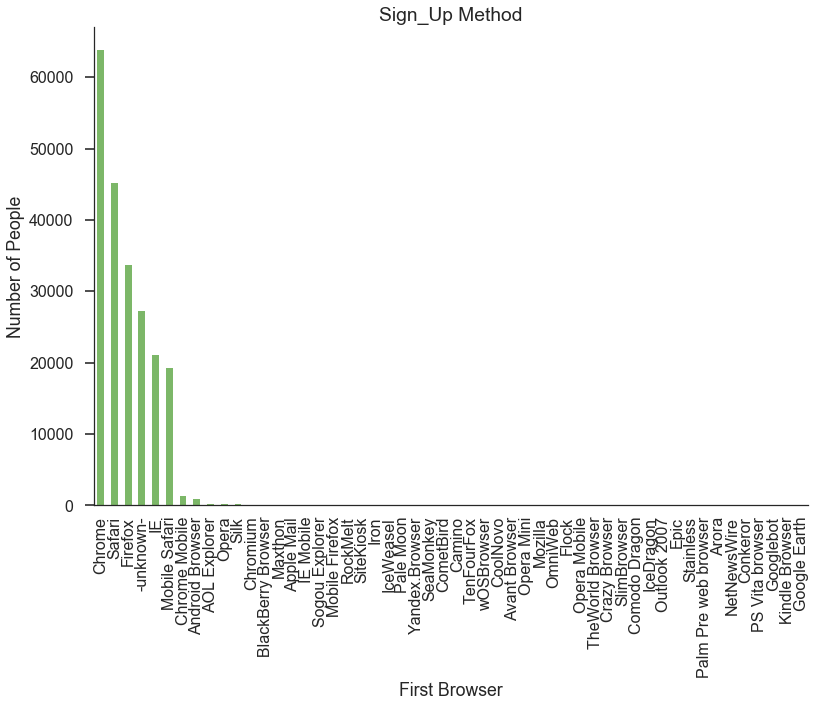

In [7]:
#Seeing the sign up browser for every user and counts users by browser
#print train_data['first_browser'].describe()

with sns.axes_style("darkgrid"):
    sns.set_style("white", {'ytick.major.size': 9.0})
    sns.set_context("poster")
    df.first_browser.value_counts(dropna=False).plot(kind='bar',color="#7cb768")
    plt.xlabel('First Browser')
    plt.ylabel('Number of People')
    plt.title('Sign_Up Method')
    sns.despine()
    plt.show()

In [10]:
# Converting the datatime for timestamp_first_active column
df['timestamp_first_active']=pd.to_datetime(df['timestamp_first_active'],format='%Y%m%d%H%M%S')

In [11]:
# Seeing the device which has been used for sign up and the increase-decrease for very device per year
df1=df.groupby(df['timestamp_first_active'].map(lambda x:x.year))['first_device_type'].value_counts()
df5=df1.unstack()
df5=df5.drop(df5.index[0])
df5=df5.T
df5['Overall']=df5.sum(axis=1)

df5=df5.apply(lambda x: x/float(x.sum()))
df5.sort_values('Overall',ascending=False, inplace=True)
df5=df5.applymap(lambda x: "{:,.2%}".format(x))
pd.DataFrame(df5)

timestamp_first_active,2010,2011,2012,2013,2014,Overall
first_device_type,,,,,,
Mac Desktop,37.40%,40.38%,47.21%,44.22%,37.25%,41.98%
Windows Desktop,21.56%,25.28%,37.64%,36.88%,30.98%,34.07%
iPhone,5.83%,6.33%,3.79%,7.46%,15.91%,9.73%
iPad,4.54%,4.83%,6.08%,7.11%,6.99%,6.72%
Other/Unknown,28.75%,21.26%,3.78%,2.82%,4.62%,5.00%
Android Phone,1.11%,1.16%,0.71%,0.41%,2.63%,1.31%
Android Tablet,0.43%,0.36%,0.30%,0.49%,0.93%,0.61%
Desktop (Other),0.39%,0.36%,0.41%,0.59%,0.65%,0.56%
SmartPhone (Other),nan%,0.05%,0.07%,0.01%,0.04%,0.04%


In [12]:
df5.to_csv('Analysis3_1.csv')

In [13]:
df_result = pd.read_csv("Analysis3_1.csv")

In [14]:
df_result['2010'], df_result['%'] = df_result['2010'].str.split('%', 1).str
df_result['2011'], df_result['%'] = df_result['2011'].str.split('%', 1).str
df_result['2012'], df_result['%'] = df_result['2012'].str.split('%', 1).str
df_result['2013'], df_result['%'] = df_result['2013'].str.split('%', 1).str
df_result['2014'], df_result['%'] = df_result['2014'].str.split('%', 1).str

In [15]:
df_result.drop(df_result.columns[[6,7]], axis=1, inplace=True)

In [16]:
df_result['2010']=df_result['2010'].astype(str).astype(float)
df_result['2011']=df_result['2011'].astype(str).astype(float)
df_result['2012']=df_result['2012'].astype(str).astype(float)
df_result['2013']=df_result['2013'].astype(str).astype(float)
df_result['2014']=df_result['2014'].astype(str).astype(float)

In [17]:
df_result.dtypes

first_device_type     object
2010                 float64
2011                 float64
2012                 float64
2013                 float64
2014                 float64
dtype: object

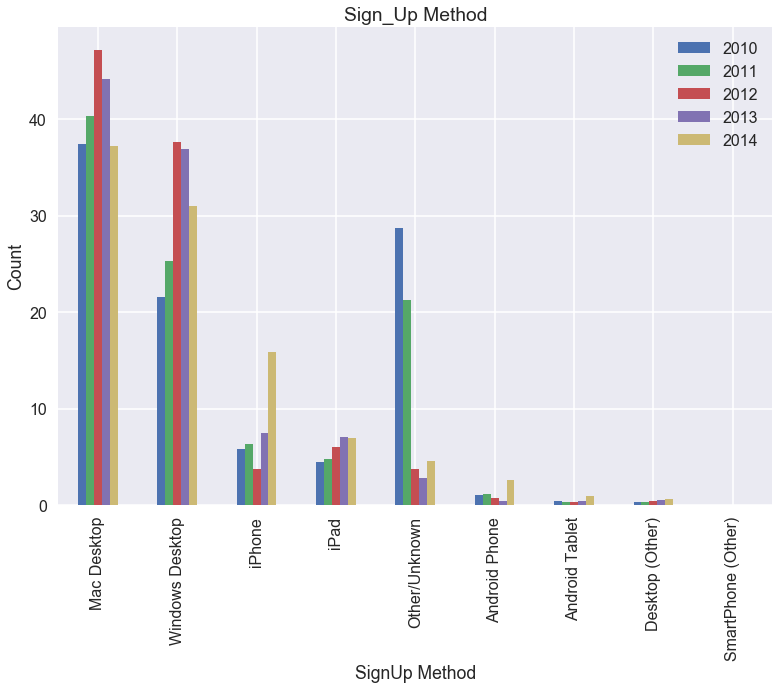

In [18]:
# Sign up device and its trend over years for account creation
df_result.plot.bar()
plt.xticks((0,1, 2,3,4,5,6,7,8),
           ('Mac Desktop', 'Windows Desktop','iPhone','iPad','Other/Unknown','Android Phone','Android Tablet',
            'Desktop (Other)','SmartPhone (Other)'))
plt.xlabel('SignUp Method')
plt.ylabel('Count')
plt.title('Sign_Up Method')
plt.show()
